## Bike Sharing
### Ermina, Griffin, Yaphet, Aidan

In [1]:
from yellowbrick.datasets import load_bikeshare
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Packages to import and manipulate data
import sqlite3
import pandas as pd
import numpy as np

# Packages to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Packages to create and visualize machine learning models from yellowbrick
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix

# Packages to create machine learning models from scikit-learn
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

#Evaluation toolset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import FeatureImportances

### Hypothesis: weather influences the number of bike share riders at a given hour

Read in the data

In [3]:
dataset = load_bikeshare(return_dataset=True)
print(dataset.README)

df = dataset.to_dataframe()
df.head()

# Bike Sharing

**Downloaded from the UCI Machine Learning Repository on May 4, 2017.**

- Univariate Data Set
- Integer, Real Attributes
- 17,379 Instances
- 16 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

## Abstract

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

## Description

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due t

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:>

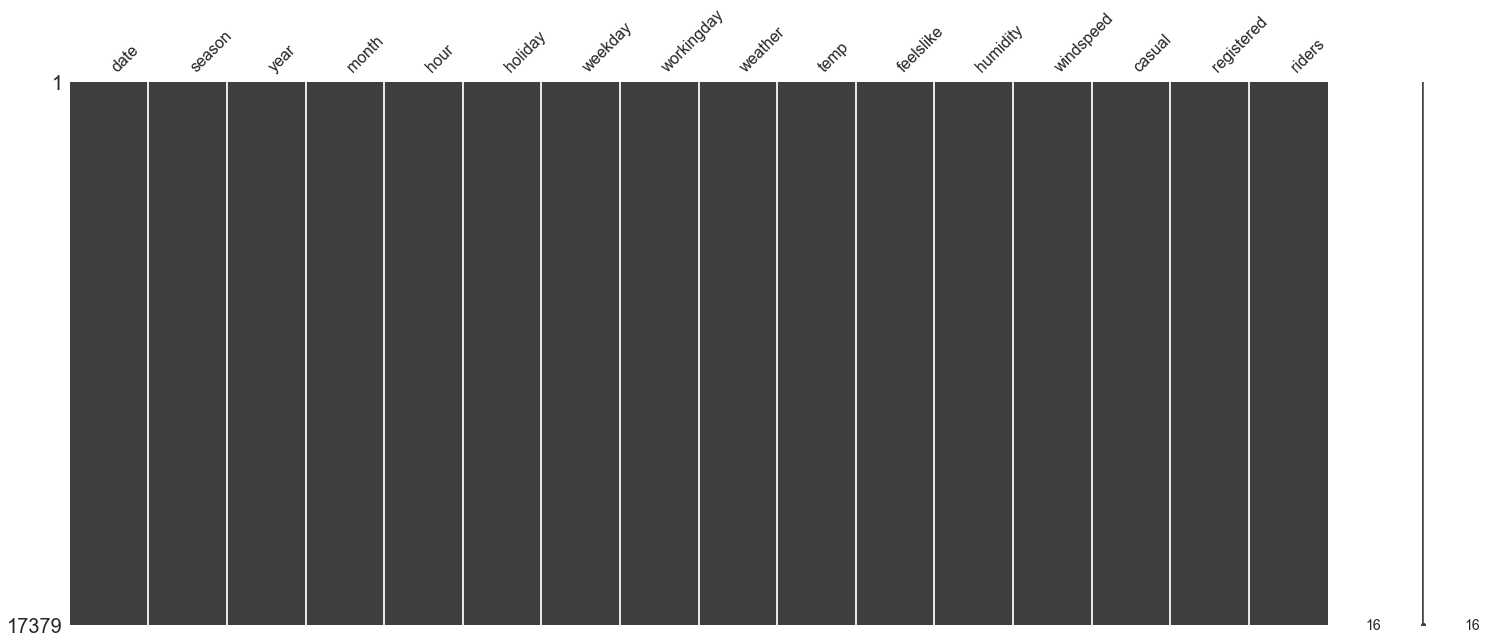

In [5]:
msno.matrix(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        17379 non-null  object 
 1   season      17379 non-null  int64  
 2   year        17379 non-null  int64  
 3   month       17379 non-null  int64  
 4   hour        17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weather     17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  feelslike   17379 non-null  float64
 11  humidity    17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  riders      17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [10]:
df.dtypes

date           object
season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
feelslike     float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
riders          int64
dtype: object

In [11]:
numerics = ['season','year','month','hour','holiday','weekday','workingday','weather','casual','registered','riders']

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

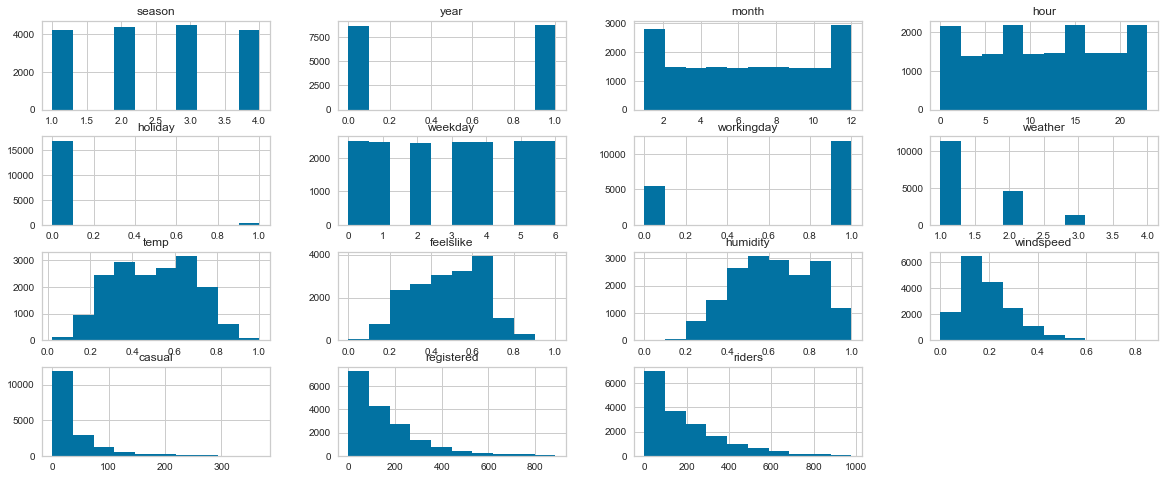

In [16]:
df.hist(figsize=(20,8))
plt.show()

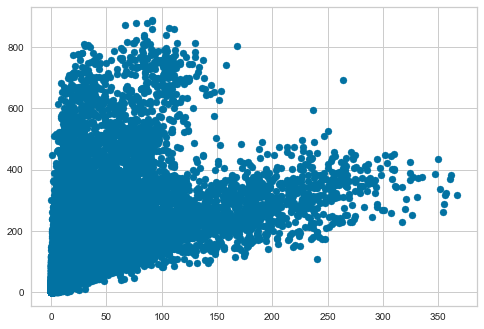

In [21]:
plt.scatter(df['casual'], df['registered'])

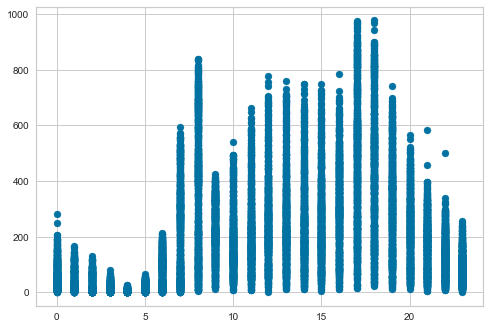

In [22]:
plt.scatter(df['hour'], df['riders'])

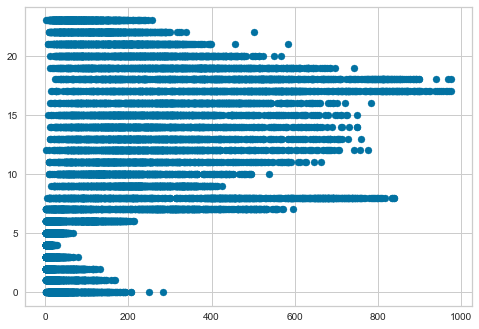

In [23]:
plt.scatter(df['riders'], df['hour'])

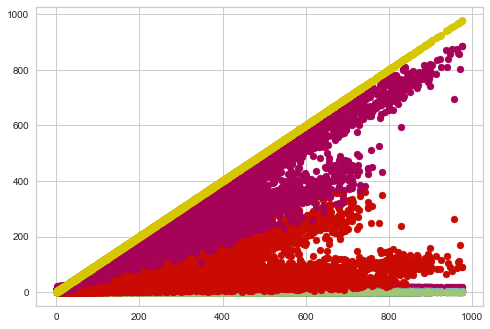

In [25]:
for n in numerics:
    x = plt.scatter(df['riders'],df[n])
    print(x)

In [26]:
import seaborn as sns

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will b

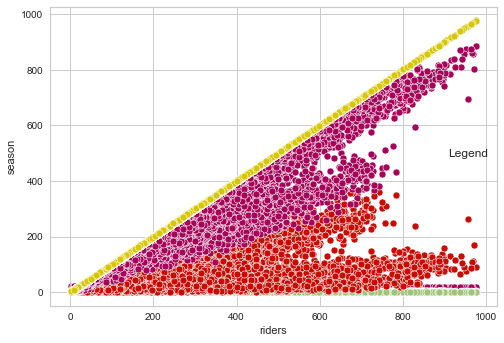

In [32]:
for n in numerics:
    sns.scatterplot(df['riders'], df[n])
    plt.legend(loc='center right', title='Legend')

No handles with labels found to put in legend.


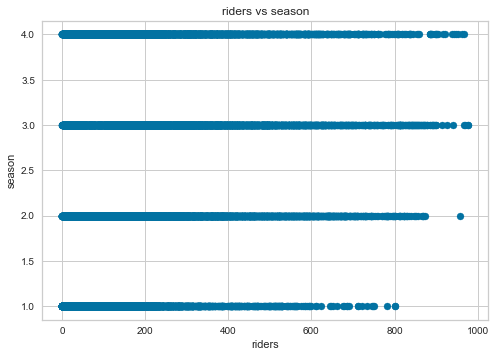

No handles with labels found to put in legend.


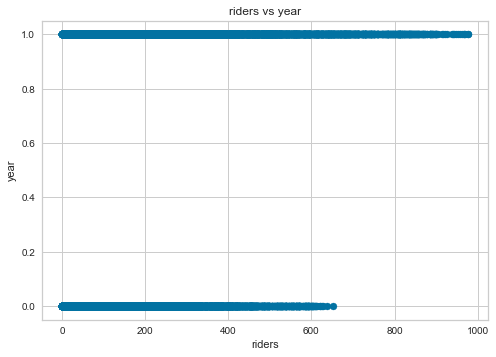

No handles with labels found to put in legend.


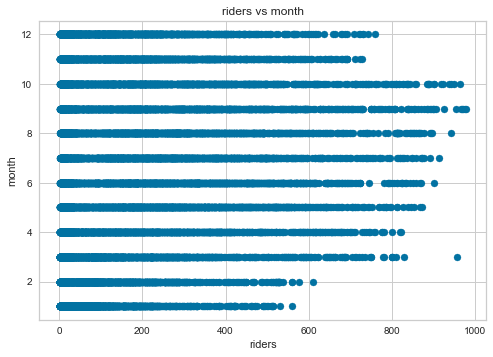

No handles with labels found to put in legend.


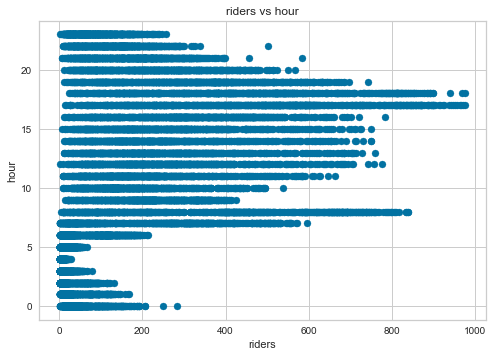

No handles with labels found to put in legend.


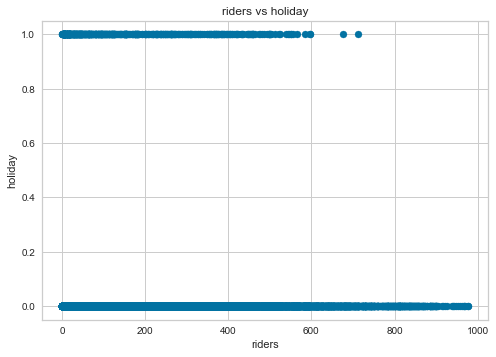

No handles with labels found to put in legend.


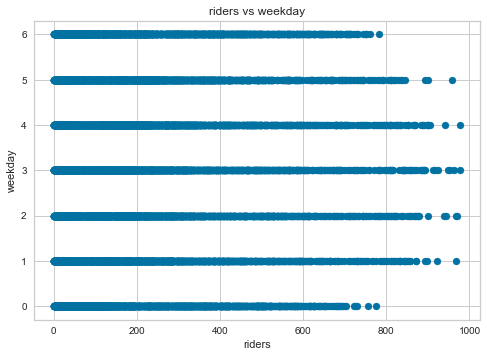

No handles with labels found to put in legend.


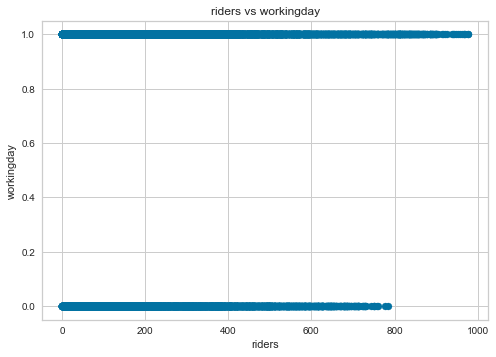

No handles with labels found to put in legend.


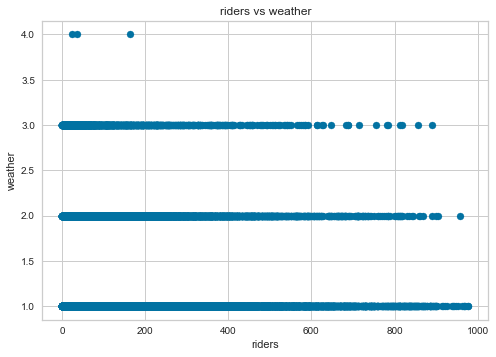

No handles with labels found to put in legend.


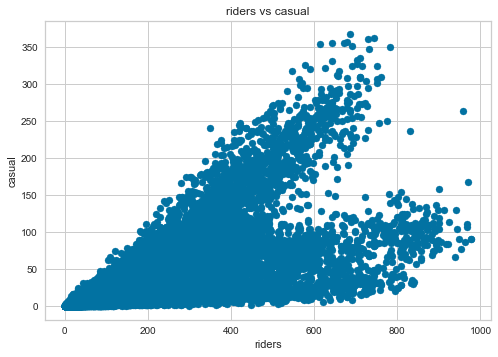

No handles with labels found to put in legend.


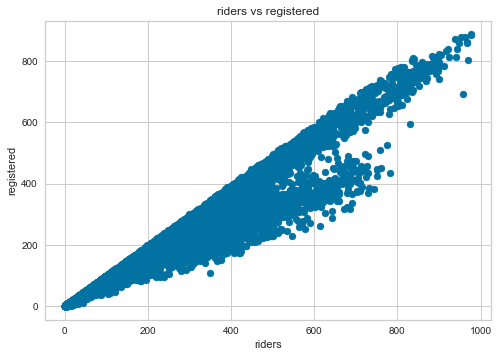

No handles with labels found to put in legend.


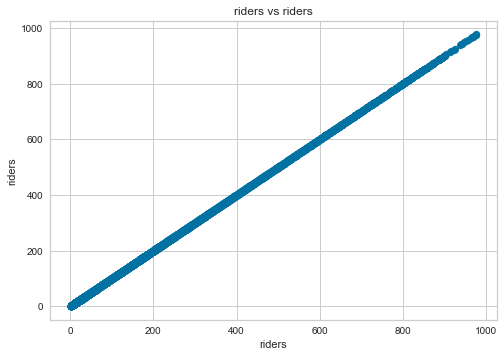

In [43]:
for y_col in numerics:

    figure = plt.figure

    ax = plt.gca()
    ax.scatter(df['riders'], df[y_col])
    ax.set_xlabel('riders')
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format('riders', y_col))

    plt.legend()
    plt.show()

- casual: count of casual users
- registered: count of registered users
- riders: count of total rental bikes including both casual and registered

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


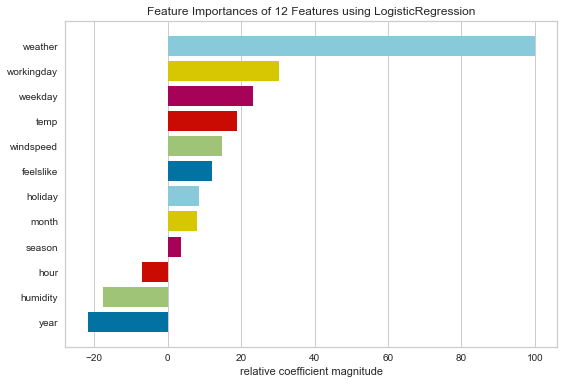

<AxesSubplot:title={'center':'Feature Importances of 12 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [100]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X, y = load_bikeshare()

model = LogisticRegression()
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [101]:
X = X.drop(['year','humidity','hour','season'], axis = 'columns')

In [102]:
X

,month,holiday,weekday,workingday,weather,temp,feelslike,windspeed
0,1,0,6,0,1,0.24,0.2879,0.0000
1,1,0,6,0,1,0.22,0.2727,0.0000
2,1,0,6,0,1,0.22,0.2727,0.0000
3,1,0,6,0,1,0.24,0.2879,0.0000
4,1,0,6,0,1,0.24,0.2879,0.0000
...,...,...,...,...,...,...,...,...
17374,12,0,1,1,2,0.26,0.2576,0.1642
17375,12,0,1,1,2,0.26,0.2576,0.1642
17376,12,0,1,1,1,0.26,0.2576,0.1642
17377,12,0,1,1,1,0.26,0.2727,0.1343


In [103]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [104]:
X = df_scaled
X

,month,holiday,weekday,workingday,weather,temp,feelslike,windspeed
0,-1.610438,-0.172112,1.493891,-1.46690,-0.665193,-1.334648,-1.093281,-1.553889
1,-1.610438,-0.172112,1.493891,-1.46690,-0.665193,-1.438516,-1.181732,-1.553889
2,-1.610438,-0.172112,1.493891,-1.46690,-0.665193,-1.438516,-1.181732,-1.553889
3,-1.610438,-0.172112,1.493891,-1.46690,-0.665193,-1.334648,-1.093281,-1.553889
4,-1.610438,-0.172112,1.493891,-1.46690,-0.665193,-1.334648,-1.093281,-1.553889
...,...,...,...,...,...,...,...,...
17374,1.588467,-0.172112,-0.998987,0.68171,0.898924,-1.230779,-1.269602,-0.211691
17375,1.588467,-0.172112,-0.998987,0.68171,0.898924,-1.230779,-1.269602,-0.211691
17376,1.588467,-0.172112,-0.998987,0.68171,-0.665193,-1.230779,-1.269602,-0.211691
17377,1.588467,-0.172112,-0.998987,0.68171,-0.665193,-1.230779,-1.181732,-0.456099


In [105]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13903, 8) (13903,)
(3476, 8) (3476,)


In [106]:
model = LogisticRegression(solver='lbfgs')
visualizer = ClassificationReport(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall

KeyError: 674

In [ ]:
#LogisticRegressionCV(cv=3, max_iter=100)

In [99]:
#from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

# Load the classification data set
X, y = load_bikeshare()

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

X = df_scaled

X_train, X_test, y_train, y_test = tts(X, y, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = LogisticRegression(solver='lbfgs')
visualizer = ClassificationReport(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

(13903, 12) (13903,)
(3476, 12) (3476,)


/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall

KeyError: 667

In [97]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=500)
visualizer = ClassificationReport(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aidanoconnor/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyError: 671

<AxesSubplot:>

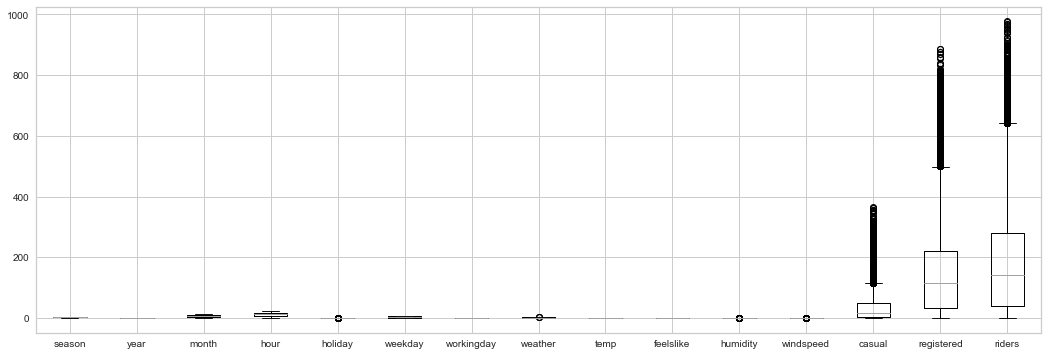

In [87]:
df.boxplot(figsize=(18,6))

<AxesSubplot:>

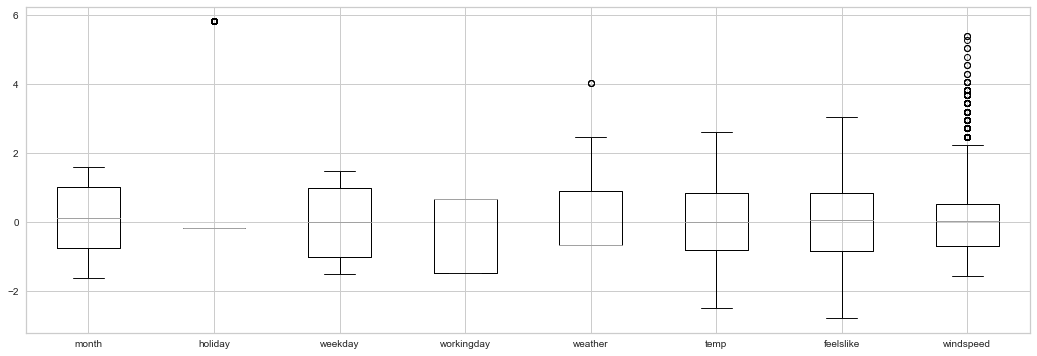

In [88]:
X.boxplot(figsize=(18,6))